Exploratory Data Analysis of Smart City IoT Sensor Data

**Grant**: BR24992852 – *“Intelligent models and methods of Smart City digital ecosystem for sustainable
development and the citizens’ quality of life improvement”*

This notebook explores IoT sensor data collected every **5 seconds** over **7 days** using:

- Temperature sensor  
- Humidity sensor  
- Light sensor  
- pH sensor  
- Electrical conductivity (EC) sensor  

The sensors are connected to an ESP Arduino microcontroller and send data via HTTP to a local server, which stores each day in a separate CSV file (17,280 rows per day).

Standard Imports

In [3]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme()

Data loading

In [4]:
# CSVs are in the SAME directory as this notebook, keep DATA_DIR = "."

DATA_DIR = "."  # change to "data" if needed

# Finds all CSV files that match the naming pattern from the dataset
csv_pattern = os.path.join(DATA_DIR, "sensor_data_2025-03-0*.csv")
csv_files = sorted(glob.glob(csv_pattern))

print("CSV files found:")
for f in csv_files:
    print(" -", f)

# Read and concatenate all days
df_list = [pd.read_csv(f, parse_dates=["timestamp"]) for f in csv_files]
data = pd.concat(df_list, ignore_index=True)

print("\nOverall shape:", data.shape)
data.head()

CSV files found:
 - ./sensor_data_2025-03-01.csv
 - ./sensor_data_2025-03-02.csv
 - ./sensor_data_2025-03-03.csv
 - ./sensor_data_2025-03-04.csv
 - ./sensor_data_2025-03-05.csv
 - ./sensor_data_2025-03-06.csv
 - ./sensor_data_2025-03-07.csv

Overall shape: (120960, 6)


,timestamp,temperature,humidity,light,pH,electrical_conductivity
0,2025-03-01 00:00:00,24.69,52.66,118.65,6.68,0.996
1,2025-03-01 00:00:05,21.89,50.18,801.71,7.29,1.044
2,2025-03-01 00:00:10,23.88,48.01,682.39,7.66,1.354
3,2025-03-01 00:00:15,20.42,56.73,146.05,7.77,0.519
4,2025-03-01 00:00:20,20.79,41.54,106.87,7.77,1.900


Basic structure and missing values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120960 entries, 0 to 120959
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   timestamp                120960 non-null  datetime64[ns]
 1   temperature              120960 non-null  float64       
 2   humidity                 120960 non-null  float64       
 3   light                    120960 non-null  float64       
 4   pH                       120960 non-null  float64       
 5   electrical_conductivity  120960 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 5.5 MB


In [6]:
# Check for missing values in each column
data.isnull().sum()

,0
timestamp,0
temperature,0
humidity,0
light,0
pH,0
electrical_conductivity,0


Time-based features

In [7]:
# Create 'date' and 'hour' columns to help group by day and hour of day
data["date"] = data["timestamp"].dt.date
data["hour"] = data["timestamp"].dt.hour

data[["timestamp", "date", "hour"]].head()

,timestamp,date,hour
0,2025-03-01 00:00:00,2025-03-01,0
1,2025-03-01 00:00:05,2025-03-01,0
2,2025-03-01 00:00:10,2025-03-01,0
3,2025-03-01 00:00:15,2025-03-01,0
4,2025-03-01 00:00:20,2025-03-01,0


Basic statistics per sensor

In [8]:
sensor_cols = ["temperature", "humidity", "light", "pH", "electrical_conductivity"]

# Overall stats
stats_overall = data[sensor_cols].agg(["mean", "min", "max", "var"])
print("Overall statistics:")
stats_overall

Overall statistics:


,temperature,humidity,light,pH,electrical_conductivity
mean,22.500301,50.026163,549.103790,7.000135,1.249303
min,20.000000,40.000000,100.000000,6.000000,0.500000
max,25.000000,60.000000,999.990000,8.000000,2.000000
var,2.079780,33.255800,67457.729719,0.332774,0.187840


In [9]:
# Per-day stats: mean, min, max, variance per sensor
stats_per_day = data.groupby("date")[sensor_cols].agg(["mean", "min", "max", "var"])
stats_per_day

temperature                         humidity              \
                  mean   min   max       var       mean   min   max   
date                                                                  
2025-03-01   22.501906  20.0  25.0  2.076787  49.969108  40.0  60.0   
2025-03-02   22.495532  20.0  25.0  2.091291  50.021796  40.0  60.0   
2025-03-03   22.496364  20.0  25.0  2.068080  50.022095  40.0  60.0   
2025-03-04   22.495130  20.0  25.0  2.075886  50.068409  40.0  60.0   
2025-03-05   22.501821  20.0  25.0  2.092753  50.025877  40.0  60.0   
2025-03-06   22.504014  20.0  25.0  2.089585  50.074053  40.0  60.0   
2025-03-07   22.507337  20.0  25.0  2.064663  50.001805  40.0  60.0   

                            light                                      pH  \
                  var        mean     min     max           var      mean   
date                                                                        
2025-03-01  33.190824  549.860495  100.04  999.96  67778.124362  7.000854   
2025-03-02  33.437511  549.752845  100.00  999.99  67861.497446  7.007094   
2025-03-03  32.897227  548.106049  100.01  999.94  66843.005575  7.004102   
2025-03-04  33.352881  546.905672  100.01  999.98  67714.620014  6.996516   
2025-03-05  33.691031  550.992951  100.12  999.94  67678.138019  6.992844   
2025-03-06  33.233635  549.340697  100.00  999.99  67386.614084  7.003472   
2025-03-07  32.991073  548.767822  100.00  999.99  66954.973085  6.996062   

                               electrical_conductivity                      
            min  max       var                    mean  min  max       var  
date                                                                        
2025-03-01  6.0  8.0  0.332649                1.247213  0.5  2.0  0.186204  
2025-03-02  6.0  8.0  0.331773                1.253501  0.5  2.0  0.187283  
2025-03-03  6.0  8.0  0.334303                1.246247  0.5  2.0  0.188222  
2025-03-04  6.0  8.0  0.331461                1.249887  0.5  2.0  0.188232  
2025-03-05  6.0  8.0  0.333197                1.255335  0.5  2.0  0.187576  
2025-03-06  6.0  8.0  0.332914                1.244634  0.5  2.0  0.188750  
2025-03-07  6.0  8.0  0.333080                1.248303  0.5  2.0  0.188587

Time series trends for temperature, humidity, and light

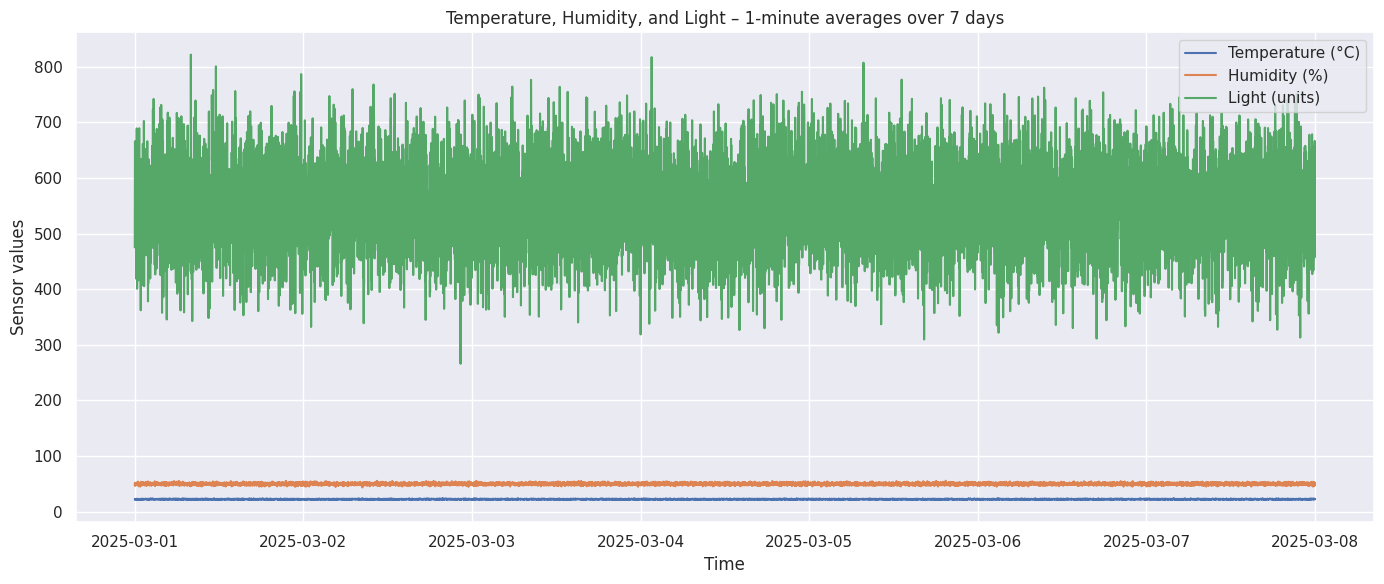

In [10]:
# Set timestamp as index for easy resampling
data_ts = data.set_index("timestamp")

# Resample to 1-minute averages to make the plot clearer
resampled = data_ts.resample("1min")[["temperature", "humidity", "light"]].mean()

# Ensure output folder for figures
FIG_DIR = "figures"
os.makedirs(FIG_DIR, exist_ok=True)

plt.figure(figsize=(14, 6))
plt.plot(resampled.index, resampled["temperature"], label="Temperature (°C)")
plt.plot(resampled.index, resampled["humidity"], label="Humidity (%)")
plt.plot(resampled.index, resampled["light"], label="Light (units)")

plt.title("Temperature, Humidity, and Light – 1-minute averages over 7 days")
plt.xlabel("Time")
plt.ylabel("Sensor values")
plt.legend()
plt.tight_layout()

# Save figure to use in README
plt.savefig(os.path.join(FIG_DIR, "temp_humidity_light_timeseries.png"), dpi=150)

plt.show()

Day 1 light pattern (possible day–night cycle)

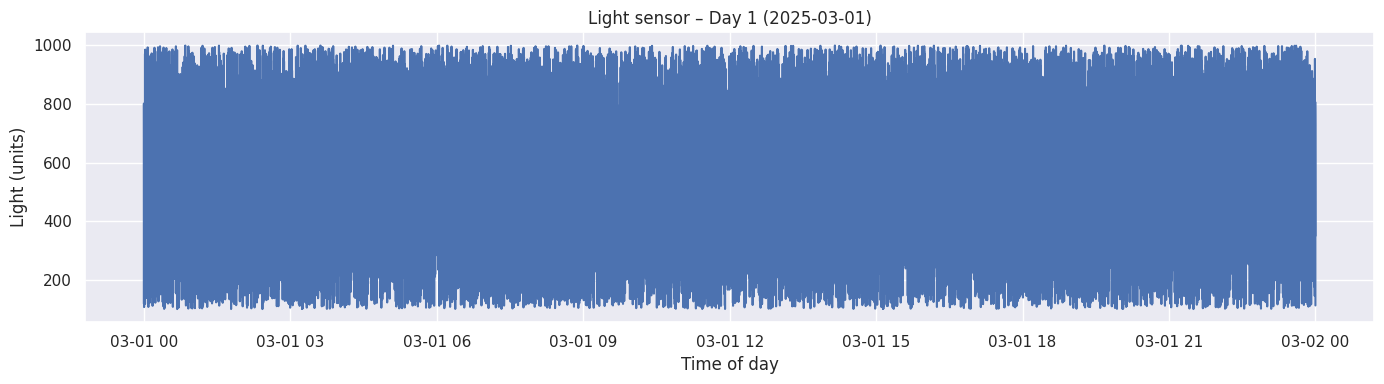

In [11]:
day1_date = data["date"].min()
day1 = data[data["date"] == day1_date].copy()

plt.figure(figsize=(14, 4))
plt.plot(day1["timestamp"], day1["light"])
plt.title(f"Light sensor – Day 1 ({day1_date})")
plt.xlabel("Time of day")
plt.ylabel("Light (units)")
plt.tight_layout()

plt.savefig(os.path.join(FIG_DIR, "light_day1_24h.png"), dpi=150)
plt.show()

Temperature vs humidity: scatter plot and correlation

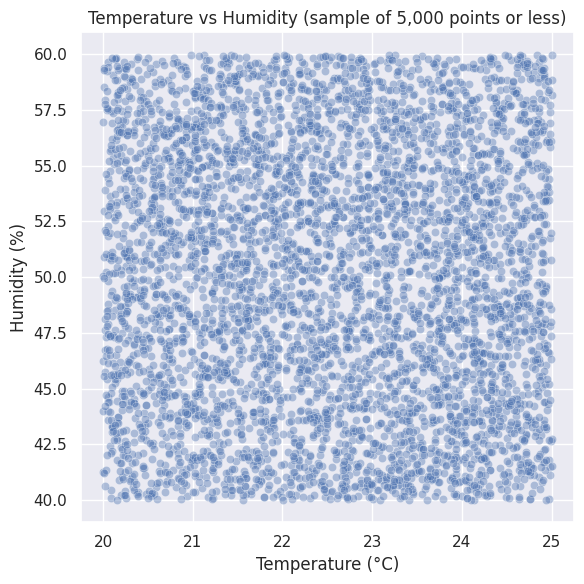

Correlation between temperature and humidity: 0.0036553945880165857


In [12]:
# Sample a subset for a clearer scatter (to avoid plotting 120k+ points)
sample_size = min(5000, len(data))
data_sample = data.sample(sample_size, random_state=42)

plt.figure(figsize=(6, 6))
sns.scatterplot(data=data_sample, x="temperature", y="humidity", alpha=0.4)
plt.title("Temperature vs Humidity (sample of 5,000 points or less)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.tight_layout()

plt.savefig(os.path.join(FIG_DIR, "temp_vs_humidity_scatter.png"), dpi=150)
plt.show()

# Compute Pearson correlation
corr_temp_hum = data["temperature"].corr(data["humidity"])
print("Correlation between temperature and humidity:", corr_temp_hum)

Correlation matrix between all sensors

Correlation matrix:


,temperature,humidity,light,pH,electrical_conductivity
temperature,1.000000,0.003655,-0.000423,0.000742,0.003117
humidity,0.003655,1.000000,-0.001196,0.001540,-0.001568
light,-0.000423,-0.001196,1.000000,-0.002546,-0.001242
pH,0.000742,0.001540,-0.002546,1.000000,0.001322
electrical_conductivity,0.003117,-0.001568,-0.001242,0.001322,1.000000


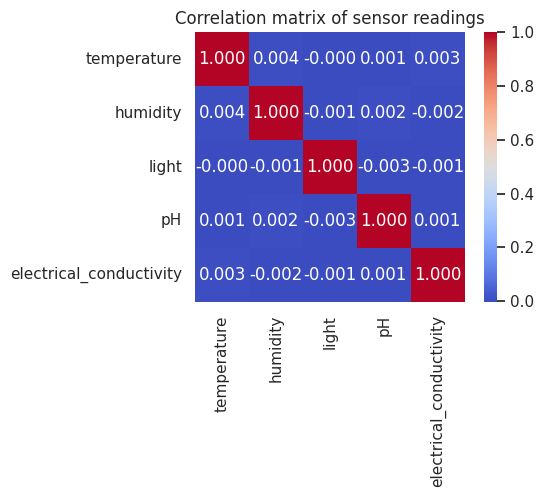

In [13]:
corr = data[sensor_cols].corr()
print("Correlation matrix:")
display(corr)

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".3f", square=True)
plt.title("Correlation matrix of sensor readings")
plt.tight_layout()

plt.savefig(os.path.join(FIG_DIR, "sensor_correlation_heatmap.png"), dpi=150)
plt.show()

Hourly averages (by hour of day)

In [14]:
hourly_means = data.groupby("hour")[["temperature", "humidity", "light"]].mean()
hourly_means

,temperature,humidity,light
hour,,,
0,22.486442,50.052891,549.796238
1,22.472857,50.074171,548.577121
2,22.510361,49.865665,552.316163
3,22.505956,50.099629,550.011635
4,22.485714,49.958905,553.290444
5,22.523234,50.139141,547.390792
6,22.456153,50.027885,546.959030
7,22.514256,50.072268,553.517194
8,22.513808,50.065335,550.958867


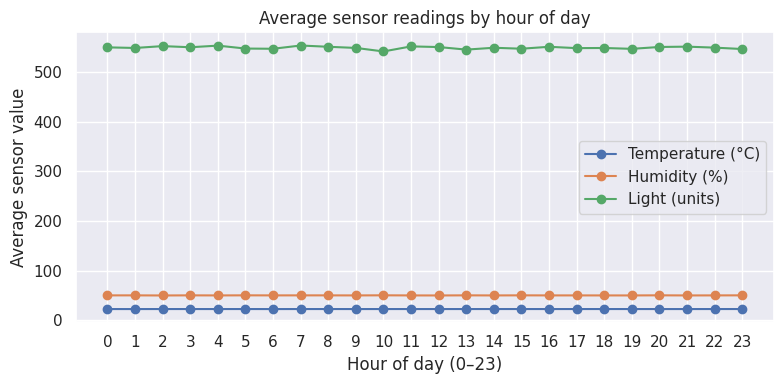

In [15]:
plt.figure(figsize=(8, 4))
hourly_means["temperature"].plot(marker="o", label="Temperature (°C)")
hourly_means["humidity"].plot(marker="o", label="Humidity (%)")
hourly_means["light"].plot(marker="o", label="Light (units)")

plt.xticks(range(0, 24))
plt.xlabel("Hour of day (0–23)")
plt.ylabel("Average sensor value")
plt.title("Average sensor readings by hour of day")
plt.legend()
plt.tight_layout()
plt.show()